## Bayes learn (chapter 4)

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def lineplot(x, y):
    plt.plot(x,y)
    plt.xlabel('Hypotheses')
    plt.ylabel('Probabilities')

In [25]:
from __future__ import division, unicode_literals
import logging

class Bayes(object):
    """A bayes class, mainly a dictionary"""
    def __init__(self, hypos=None, name=''):
        """
        Initialize the distribution.
        
        hypos: sequence of hypotheses
        """
        self.name = name
        self.pmf = {}
        if hypos is None:
            return
        
        self.hypos = hypos
        # Initiate the class object
        # Three initalize methods are used to deal with different types of input
        # 
        init_methods = [
            self.InitPmf,
            self.InitMapping,  #A dict
            self.InitSequence, #equal probability for all hypos
            self.InitFailure,
        ]
        
        for method in init_methods:
            try:
                method(hypos)
                break
            except AttributeError:
                continue
        
        if len(self):
            self.Normalize()
    
    def __str__(self):
        '''
        Stringlize self.pmf
        '''
        tmpL = ["Probability table\n"]
        for hypo, prob in sorted(self.pmf.iteritems()):
            tmpL.append('\t'.join(['',str(hypo), str(prob)]))
        return '\n'.join(tmpL)
    
    def InitSequence(self, hypos):
        """
        Initialize with a sequence of hypos with equal probabilities.
        
        hypos: ['H1','H2','H3',...]
        """
        for hypo in hypos:
            self.Set(hypo, 1)
    
    def InitMapping(self, hypos):
        """
        Initialize with a map from value to probablity (a dict).
        
        hypos = {'H1':1, 'H2':5, 'H3':4}
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitPmf(self, hypos):
        """
        Initialize with a Bayes object.
        
        hypos = Bayes()
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitFailure(self, hypos):
        """Raise an errot"""
        raise ValueError("None of the initialization methods works.")
    
    def __len__(self):
        return len(self.pmf)
    
    def Set(self, hypo, prob=0):
        """
        Set hypo-prob pair
        """
        self.pmf[hypo] = prob
    
    def Print(self):
        """Print the values and freqs in asending order."""
        for hypo, prob in sorted(self.pmf.iteritems()):
            print hypo, prob
    
    def Normalize(self):
        """
        Normalize probability
        """
        total = float(sum(self.pmf.values()))
        if total == 0.0:
            raise ValueError('total probability is zero.')
            logging.warning('Normalize: total probability is zero.')
            return total
        
        factor = 1 / total
        
        for hypo in self.pmf:
            self.pmf[hypo] *= factor
    
    def Items(self):
        '''Return two lists, hypos_list and probability_list'''
        if isinstance(self.hypos, list):
            hypos = self.hypos
        else:
            hypos = self.pmf.keys()
            hypos.sort()
        probs = [self.pmf[hypo] for hypo in hypos]
        return hypos, probs
    
    def Max(self):
        '''Return the hypothesis with maximum posterior probability'''
        max_prob, max_hypo = max([(prob,hypo) for hypo, prob in self.pmf.iteritems()])
        return max_hypo, max_prob
    
    def Mult(self, hypo, likelihood):
        '''
        Update given hypo probability by given likelihood
        '''
        self.pmf[hypo] = self.pmf.get(hypo,0) * likelihood
    
    def Prob(self, hypo, default=0):
        """
        Get the probability of given hypo.
        """
        return self.pmf.get(hypo, default)
    
    def Update(self,dataL):
        '''
        Update all hypo probability by given obervation.
        
        dataL: A list of observations.
        '''
        for data in dataL:
            for hypo, prob in self.pmf.iteritems():
                self.pmf[hypo] = prob * self.Likelihood(hypo, data)
        self.Normalize()
    
    def Likelihood(self, hypo, data):
        '''
        Re-constructed in child class
        '''
        psss
    
    def Mean(self):
        '''
        Compute the weighted hypothesis using posterior probabilities.
        '''
        total = 0
        for hypo, prob in self.pmf.iteritems():
            total += hypo * prob
        return total
    
    def Percentile(self, percentage):
        '''
        Compute a percentile for a given percentage.
        
        percentage: float from 0 to 100.
        ''' 
        if isinstance(self.hypos, list):
            hypos = self.hypos
        else:
            hypos = self.pmf.keys()
            hypos.sort()
        total = 0
        assert 0<=percentage<=100, "percentage must between [0,100]"
        percentile_value = percentage / 100.0
        for hypo in hypos:
            total += self.pmf[hypo]
            if total >= percentile_value:
                return hypo
    def probPlot(self):
        hypos, probs = self.Items()
        plt.plot(hypos, probs)
        plt.xlabel('Hypothses')
        plt.ylabel('Probabilities')

### 4.1 欧元问题

When spun on edge 250 times, a Belgian one-euro coin
came up heads 140 times and tails 110. ‘It looks very
suspicious to me,’ said Barry Blight, a statistics lecturer
at the London School of Economics. ‘If the coin were
unbiased, the chance of getting a result as extreme as
that would be less than 7%.’

But do these data give evidence that the coin is biased rather
than fair?



一枚欧元硬币抛掷250次之后，发现有140次看到正面，110次看到背面。伦敦经济学院的统计学老师Barry Blight说“这枚欧元硬币看起来很可疑。如果它是均匀的，抛掷相同次数得到这个结果的概率为7%。”请问这些数据能否说明硬币是均匀的？

* 观察到的数据 D: 140次正面，110次负面
* 假设
    * H1：硬币是均匀的
    * H2：硬币是不均一的

* $P(H1|D) = \frac{P(H1) * P(D|H1)}{P(D)} = P(H1) * {250 \choose 140}\Bigl(\frac{1}{2}\Bigl)^{140} * \Bigl(\frac{1}{2}\Bigl)^{110}$

* $P(H2|D) = \frac{P(H2) * P(D|H2)}{P(D)} = P(H2) * {250 \choose 140}\Bigl(P(正面)\Bigl)^{140} * \Bigl(P(反面)\Bigl)^{110}$

问题是，
    * P(H1)未知；
    * 给定H2后，P(正面)的概率不确定

为了解决这个问题，我们需要换一种思路。我们把假设做的更明确些，即我们假设硬币抛掷一次正面出现的概率为0到100，共101个假设。并且假定每个假设出现的频率是相等的。在此基础上，我们计算各个假设的后验概率。

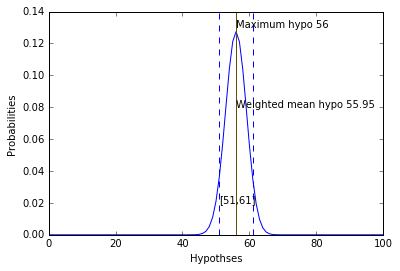

In [3]:
class Coins(Bayes):
    def Likelihood(self, hypo, data):
        
        if data == 'H':
            return hypo / 100.0
        else:
            return 1-hypo/100.0

hypos = [i for i in range(0,101)]

coins = Coins(hypos)

# 对于观察数据的处理，我们把它分解成250次观察。
# 得到250次观察结果，其中140个H和110个T
dataset = 'H' * 140 + 'T' * 110

# 对于不同的假设，出现H和T的组合数目时一致的。

coins.Update(dataset)

#print coins
hypo, prob = coins.Items()
max_hypo, max_prob = coins.Max() 
plt.plot(hypo, prob)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axvline(max_hypo, color='r')
plt.annotate(xy=(max_hypo, 0.13),s="Maximum hypo "+str(max_hypo))
weighted_mean_hypo = coins.Mean()
plt.axvline(weighted_mean_hypo,color='g',alpha=0.6)
plt.annotate(xy=(weighted_mean_hypo,0.08),s="Weighted mean hypo %.2f" % weighted_mean_hypo)

lower_5 = coins.Percentile(5)
upper_95 = coins.Percentile(95)
plt.axvline(lower_5,color='b',ls="dashed")
plt.axvline(upper_95,color='b',ls="dashed")
plt.annotate(xy=(lower_5,0.02),s="["+str(lower_5)+','+str(upper_95)+']')

从上面的计算可以看出，概率值最大的假设是56。这与观察到的正面出现的概率`140/250=56%`一致。因此观察到的比例是最大的似然值估计。其90%的置信区间为`[51,61]`。而`50%`正好不在这个置信区间内，表明这个硬币是不均匀的。

在开始时，我们提出的问题是“这些数据是否可以支持硬币是不均匀的”。那么怎么才能说明一份证据是否支持一个假设呢？

这儿可能有一个困惑，既然我们想知道硬币是不是均匀的，那么我们为什么不计算硬币是均匀的概率即`coins.Prob(50)`的数值? 这个值时0.021，但这个值却没有任何意义。因为这是在我们做出的101个假设的基础上得到的，而实际上硬币的不均匀程度是连续分布的，可以做出的假设数目会很多，这时每部分的概率也会相应变化。

### 4.3 欧元问题（不同的先验概率）

前面我们对提出的101个假设分配了相同的概率，但这可能并不妥当。如果一个硬币是不均匀的，那么随着这个不均匀率离50%越远，则发生的概率越低。

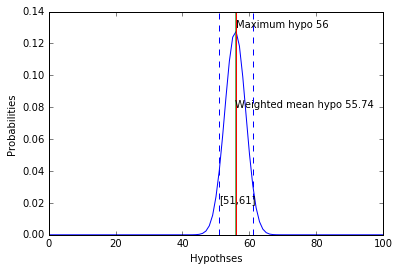

In [4]:
class Coins(Bayes):
    def Likelihood(self, hypo, data):
        
        if data == 'H':
            return hypo / 100.0
        else:
            return 1-hypo/100.0

#hyposD = [i for i in range(0,101)]

hyposL = []

for i in range(0,101):
    if i < 51:
        hyposL.append((i,i))
    else:
        hyposL.append((i,100-i))

hyposD = dict(hyposL)

coins = Coins(hyposD)

# 对于观察数据的处理，我们把它分解成250次观察。
# 得到250次观察结果，其中140个H和110个T
dataset = 'H' * 140 + 'T' * 110

# 对于不同的假设，出现H和T的组合数目时一致的。

coins.Update(dataset)

#print coins
hypo, prob = coins.Items()
max_hypo, max_prob = coins.Max() 
plt.plot(hypo, prob)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axvline(max_hypo, color='r')
plt.annotate(xy=(max_hypo, 0.13),s="Maximum hypo "+str(max_hypo))
weighted_mean_hypo = coins.Mean()
plt.axvline(weighted_mean_hypo,color='g',alpha=0.6)
plt.annotate(xy=(weighted_mean_hypo,0.08),s="Weighted mean hypo %.2f" % weighted_mean_hypo)

lower_5 = coins.Percentile(5)
upper_95 = coins.Percentile(95)
plt.axvline(lower_5,color='b',ls="dashed")
plt.axvline(upper_95,color='b',ls="dashed")
plt.annotate(xy=(lower_5,0.02),s="["+str(lower_5)+','+str(upper_95)+']')

结果几乎完全相同，即在足够多的观察数据下，不同的先验概率最后都会收敛到相同的后验概率分布。在下面的图中我们会看的更清楚。

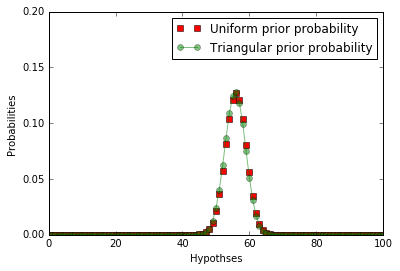

In [5]:
class Coins(Bayes):
    def Likelihood(self, hypo, data):
        
        if data == 'H':
            return hypo / 100.0
        else:
            return 1-hypo/100.0


        
uniform_prior_hypos = [i for i in range(0,101)]

hyposL = []

for i in range(0,101):
    if i < 51:
        hyposL.append((i,i))
    else:
        hyposL.append((i,100-i))

triangular_prior_hypos = dict(hyposL)

def getHyposProbs(prior_distribute):
    coins = Coins(prior_distribute)

    # 对于观察数据的处理，我们把它分解成250次观察。
    # 得到250次观察结果，其中140个H和110个T
    dataset = 'H' * 140 + 'T' * 110

    # 对于不同的假设，出现H和T的组合数目时一致的。

    coins.Update(dataset)

    #print coins
    hypo, prob = coins.Items()
    return hypo,prob

uniform_hypo, uniform_post = getHyposProbs(uniform_prior_hypos)
triangu_hypo, triangu_post = getHyposProbs(triangular_prior_hypos)

plt.plot(uniform_hypo, uniform_post, 'rs',label="Uniform prior probability")
plt.plot(triangu_hypo, triangu_post, 'go-',label="Triangular prior probability",alpha=0.5)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axis([0, 100, 0, 0.2])
plt.legend()

### 4.4 数据集表示和似然函数优化

换一种方式来定义我们观察到的数据集和似然函数。这种计算方式类似于我们最先提出的那两个公式，可以大大提高计算效率。

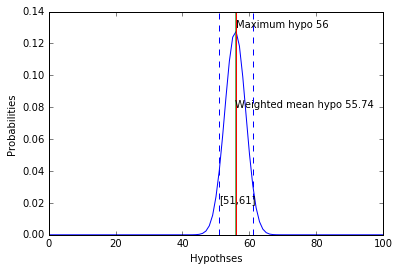

In [6]:
class Coins(Bayes):
    def Likelihood(self, hypo, data):
        heads, tails = data
        return (hypo/100.0)**heads * (1-hypo/100.0)**tails
        

#hyposD = [i for i in range(0,101)]

hyposL = []

for i in range(0,101):
    if i < 51:
        hyposL.append((i,i))
    else:
        hyposL.append((i,100-i))

hyposD = dict(hyposL)

coins = Coins(hyposD)

# 对于观察数据的处理，我们把它分解成250次观察。
# 得到250次观察结果，其中140个H和110个T
# dataset = 'H' * 140 + 'T' * 110
dataset = [(140,110)]

# 对于不同的假设，出现H和T的组合数目时一致的。

coins.Update(dataset)

#print coins
hypo, prob = coins.Items()
max_hypo, max_prob = coins.Max() 
plt.plot(hypo, prob)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axvline(max_hypo, color='r')
plt.annotate(xy=(max_hypo, 0.13),s="Maximum hypo "+str(max_hypo))
weighted_mean_hypo = coins.Mean()
plt.axvline(weighted_mean_hypo,color='g',alpha=0.6)
plt.annotate(xy=(weighted_mean_hypo,0.08),s="Weighted mean hypo %.2f" % weighted_mean_hypo)

lower_5 = coins.Percentile(5)
upper_95 = coins.Percentile(95)
plt.axvline(lower_5,color='b',ls="dashed")
plt.axvline(upper_95,color='b',ls="dashed")
plt.annotate(xy=(lower_5,0.02),s="["+str(lower_5)+','+str(upper_95)+']')

### 4.5 β-分布

In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution.

The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines. For example, it has been used as a statistical description of allele frequencies in population genetics;[1] time allocation in project management / control systems;[2] sunshine data;[3] variability of soil properties;[4] proportions of the minerals in rocks in stratigraphy;[5] and heterogeneity in the probability of HIV transmission.[6]

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. For example, the beta distribution can be used in Bayesian analysis to describe initial knowledge concerning probability of success such as the probability that a space vehicle will successfully complete a specified mission. The beta distribution is a suitable model for the random behavior of percentages and proportions.

The usual formulation of the beta distribution is also known as the beta distribution of the first kind, whereas beta distribution of the second kind is an alternative name for the beta prime distribution.

什么是β-分布？
，
在概率论和统计分析中，β分布是定义于区间[0,1]之上的连续概率分布，其分布模式由两个参数α和β控制，分别为随机变量的指数幂。

β分布常用于模拟随机变量在有限长度区间的行为模式，如群体遗传学中等位基因的频率，任务控制系统中的时间分配，天气的预测，HIV传播概率的异质性。

在贝叶斯推论中，β分布是伯努利分布、二项分布、负二项分布和几何分布的共轭先验概率分布。β分布可以用于在贝叶斯分析中描述成功率的起始分布，如果先验概率是β分布，那么后验概率也是β分布。

β分布的形状依赖于两个参数，α和β。如果先验概率分布的参数是`alpha`和`beta`，我们观察到`h`次正面和`t`次反面，后验概率也符合β分布，其参数是`alpha+h`和`beta+t`。这样，我们就可以通过加和来更新似然值。

幸运的是，对于很多现实的例子，β分布都可以用来作为先验概率的近似表示。对于均匀先验分布(`uniform prior`)来说，`aplha=1`和`beta=1`的β分布在`[0,1]`区间是均匀分布。




#### 4.5.1 Beta-分布详解

Beta-分布是狄里克雷分布(Dirichlet distribution)的一个特殊形式，其概率密度函数为：
$f(x;\alpha,\beta) = \frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1}$, 因为Beta分布是二项分布的参数p的概率分布，所以x(即p)的取值范围为$0<=x<=1$，概率密度函数可以重新写为$Beta(p|\alpha,\beta) = \frac{1}{B(\alpha,\beta)}p^{\alpha-1}(1-p)^{\beta-1}$。

Beta分布的期望 $E[p] = \frac{a}{a+b}$

Beta分布的方差 $var[p] = \frac{ab}{(a+b)^2(a+b+1)}$

Beta分布的众数 $mode=r=\frac{a-1}{a+b-2}$

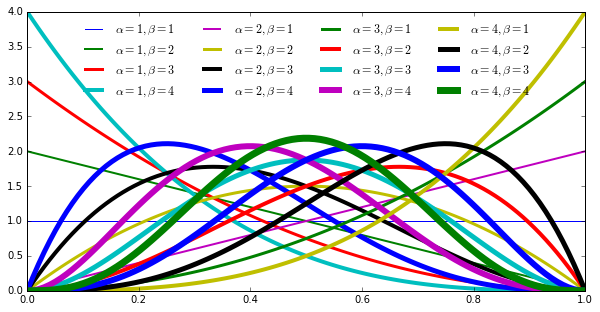

In [6]:
from scipy.stats import beta
x = np.linspace(0,1,100)

alphaL = [1,2,3,4]
betaL  = [1,2,3,4]

plt.figure(figsize=(10,5))

for i,alpha in enumerate(alphaL):
    for j,beta_p in enumerate(betaL):
        plt.plot(x, beta.pdf(x,alpha,beta_p),lw=i+j+1, label=r'$\alpha=%d, \beta=%d$' % (alpha, beta_p))

plt.legend(frameon=False, ncol=4, loc=9)

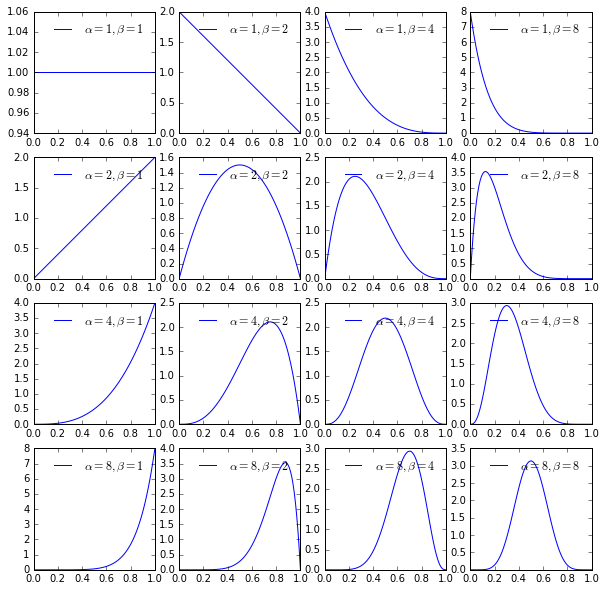

In [3]:
from scipy.stats import beta
x = np.linspace(0,1,100)

alphaL = [1,2,4,8]
betaL  = [1,2,4,8]

fig, grid = plt.subplots(len(alphaL),len(betaL), figsize=(10,10))

for i,alpha in enumerate(alphaL):
    for j,beta_p in enumerate(betaL):
        grid[i,j].plot(x, beta.pdf(x,alpha,beta_p),label=r'$\alpha=%d, \beta=%d$' % (alpha, beta_p))
        grid[i,j].legend(frameon=False)

### Beta分布参考
* http://blog.csdn.net/watkinsong/article/details/46348853
* http://cos.name/2013/01/lda-math-beta-dirichlet/
* https://mqshen.gitbooks.io/prml/content/Chapter2/binary/beta_distribute.html
* http://xinsong.github.io/2014/04/29/beta/

In [5]:
from __future__ import division, unicode_literals
import logging

class Beta(object):
    '''
    Construct a Beta-distribution class
    '''
    def __init__(self, alpha=1, beta=1, label="_nolegend_"):
        self.alpha = alpha
        self.beta  = beta
        self.label = label
    
    def Update(self, data):
        '''
        Update a Beta distribution.
        Reconstructed in child class.
        Below only used for an example, 
        data: pair of int numbers
        '''
        heads, tails = data
        self.alpha += heads
        self.beta  += tails
    
    def Mean(self):
        '''Compute the weighted mean of posterior distribution'''
        return self.alpha / (self.alpha + self.beta)
    
    def MAP(self):
        '''Compute the hypothesis with maximum posterior probability'''
        a = self.aplha - 1
        b = self.beta  - 1
        return a / (a + b)
    
    def EvalPdf(self, x):
        '''Evaluta the probability density function (PDF) at x (a hypo)
        '''
        return x ** (self.alpha-1) * (1-x) ** (self.beta-1)
    
    def MakePmf(self, hypos, label=None):
        '''Generate the probability mass function class subject.
        
        Note: Normally, we just evaluate the PDF at a sequence of points and
        treat the probability density as a probability mass.
        
        But if alpha or beta is less than one, we have to be more careful 
        because the PDF goes to infiinity at x=0 and x=1. In that case, we
        evaluate the CDF and compute differences.
        
        The result is a little funny, because the values at 0 and 1 are not
        symmetric. Nevertheless, it is a reasonable discrete model of the
        continuous distribution, and behaves well as the number of values
        increases.
        '''
        if self.alpha < 1 or self.beta < 1:
            return "Currently not supported"
        
        probs = [self.EvalPdf(hypo) for hypo in hypos]
        pmf   = Bayes(dict(zip(hypos, probs)), name=label)
        
        return pmf
        

Posterior mean: 0.559523809524


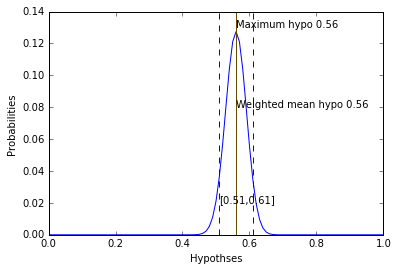

In [12]:
beta = Beta()
beta.Update([140,110])
print "Posterior mean:",beta.Mean()
hypos = [i/100.0 for i in range(0,101)]
coins = beta.MakePmf(hypos)

hypo, prob = coins.Items()
max_hypo, max_prob = coins.Max() 
plt.plot(hypo, prob)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axvline(max_hypo, color='r')
plt.annotate(xy=(max_hypo, 0.13),s="Maximum hypo "+str(max_hypo))
weighted_mean_hypo = coins.Mean()
plt.axvline(weighted_mean_hypo,color='g',alpha=0.6)
plt.annotate(xy=(weighted_mean_hypo,0.08),s="Weighted mean hypo %.2f" % weighted_mean_hypo)

lower_5 = coins.Percentile(5)
upper_95 = coins.Percentile(95)
plt.axvline(lower_5,color='b',ls="dashed")
plt.axvline(upper_95,color='b',ls="dashed")
plt.annotate(xy=(lower_5,0.02),s="["+str(lower_5)+','+str(upper_95)+']')

### 4.6 总结

在这一部分内容中，我们使用不同的先验概率分布最后结果收敛于及其相近的后验概率分布，这主要是因为观察到的数据比较大。

那是不是据此，我们就可以随便选择先验概率了呢？

也不尽然，所有的贝叶斯分析都是基于模型的，如果选择的模型不一致，即便有相同的大量数据，最后得到的后验概率也有可能不收敛。

另外，后验概率正比于先验概率和似然值，如果先验概率为0，则似然值怎么变化都不会有影响。先验概率的选取需遵从`Oliver Cromwell's rule`，如果不能从逻辑上证明一个事情为真，其概率不能赋值为1；如果不能从逻辑上证明一个事情为假，其概率不能赋值为0.

Cromwell's Rule refers to a principle that you should not give probabilities of 1 to any event that is not demonstrable by logic to be true, and never to give probability 0 to any event unless it can be logically shown to be false. It comes from Cromwell's appeal to the Church of Scotland to 'think it possible you may be mistaken'.

#### 4.7.1 假设我们不能直接看到硬币抛掷后是正面还是反面，而需要借助一个设备来测量。但是这个设备出错的概率为y, 即把正面报告为反面或把反面报告为正面。那么请估算在这个条件下硬币不均一性的后验概率的分布，并且探索这一分布与`y`的关系是什么？

Suppose that instead of observing coin tosses directly, you measure
the outcome using an instrument that is not always correct. Specifically,
suppose there is a probability y that an actual heads is reported as
tails, or actual tails reported as heads.

Write a class that estimates the bias of a coin given a series of outcomes and the value of y.

How does the spread of the posterior distribution depend on y?

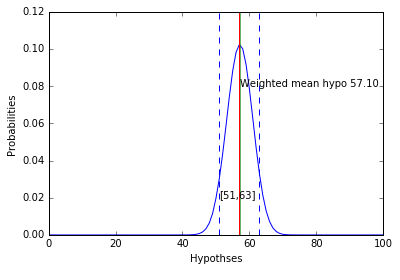

In [3]:
class Coins(Bayes):
    def Likelihood(self, hypo, data):
        if data == 'H':
            #假设设备判断正确的概率为0.9，判断错误的概率为0.1
            return hypo / 100.0 * 0.9 + (1-hypo/100.0)*0.1
        else:
            return (1-hypo/100.0) * 0.9 + hypo/100.0*0.1

#hyposD = [i for i in range(0,101)]

hyposL = []

for i in range(0,101):
    if i < 51:
        hyposL.append((i,i))
    else:
        hyposL.append((i,100-i))

hyposD = dict(hyposL)

coins = Coins(hyposD)

# 对于观察数据的处理，我们把它分解成250次观察。
# 得到250次观察结果，其中140个H和110个T
dataset = 'H' * 140 + 'T' * 110

# 对于不同的假设，出现H和T的组合数目时一致的。

coins.Update(dataset)

#print coins
hypo, prob = coins.Items()
max_hypo, max_prob = coins.Max() 
plt.plot(hypo, prob)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axvline(max_hypo, color='r')
plt.annotate(xy=(max_hypo, 0.13),s="Maximum hypo "+str(max_hypo))
weighted_mean_hypo = coins.Mean()
plt.axvline(weighted_mean_hypo,color='g',alpha=0.6)
plt.annotate(xy=(weighted_mean_hypo,0.08),s="Weighted mean hypo %.2f" % weighted_mean_hypo)

lower_5 = coins.Percentile(5)
upper_95 = coins.Percentile(95)
plt.axvline(lower_5,color='b',ls="dashed")
plt.axvline(upper_95,color='b',ls="dashed")
plt.annotate(xy=(lower_5,0.02),s="["+str(lower_5)+','+str(upper_95)+']')

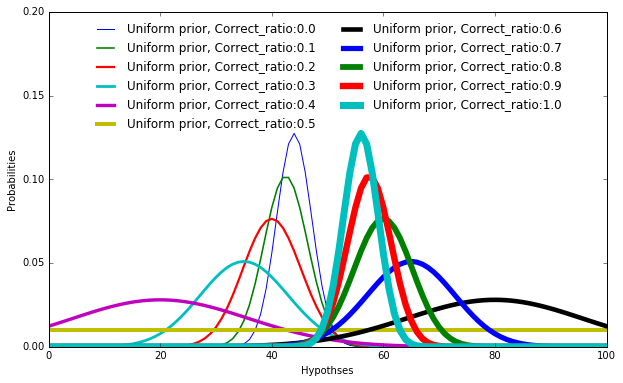

In [16]:
class Coins(Bayes):
    def Update(self, dataL, correct_ratio):
        for data in dataL:
            for hypo, prob in self.pmf.items():
                self.pmf[hypo] = prob * self.Likelihood(hypo, data, correct_ratio)
        self.Normalize()

    def Likelihood(self, hypo, data, correct_ratio):
        if data == 'H':
            #假设设备判断正确的概率为0.9，判断错误的概率为0.1
            return hypo / 100.0 * correct_ratio + (1-hypo/100.0) * (1-correct_ratio)
        else:
            return (1-hypo/100.0) * correct_ratio + hypo/100.0 * (1-correct_ratio)
#--------------------------------------------------------------------
        
uniform_prior_hypos = [i for i in range(0,101)]

hyposL = []

for i in range(0,101):
    if i < 51:
        hyposL.append((i,i))
    else:
        hyposL.append((i,100-i))

triangular_prior_hypos = dict(hyposL)

def getHyposProbs(prior_distribute, correct_ratio, name):
    coins = Coins(prior_distribute)

    # 对于观察数据的处理，我们把它分解成250次观察。
    # 得到250次观察结果，其中140个H和110个T
    dataset = 'H' * 140 + 'T' * 110

    # 对于不同的假设，出现H和T的组合数目时一致的。

    coins.Update(dataset, correct_ratio)

    #print coins
    hypo, prob = coins.Items()
    plt.plot(hypo, prob,lw=correct_ratio*6+1, label=name+", Correct_ratio:"+str(correct_ratio))
    

#uniform_hypo, uniform_post = getHyposProbs(uniform_prior_hypos)
#triangu_hypo, triangu_post = getHyposProbs(triangular_prior_hypos)

#plt.plot(uniform_hypo, uniform_post, 'rs',label="Uniform prior probability")
#plt.plot(triangu_hypo, triangu_post, 'go-',label="Triangular prior probability",alpha=0.5)
correct_ratioL = [(i+1)/10.0 for i in range(-1,10,1)]
plt.figure(figsize=(10,6))
for correct_ratio in correct_ratioL:
    getHyposProbs(uniform_prior_hypos, correct_ratio, "Uniform prior")

plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axis([0, 100, 0, 0.2])
plt.legend(frameon=False, ncol=2, loc=9)

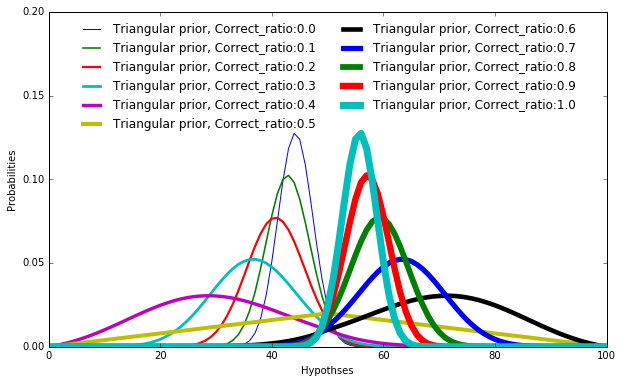

In [17]:
class Coins(Bayes):
    def Update(self, dataL, correct_ratio):
        for data in dataL:
            for hypo, prob in self.pmf.items():
                self.pmf[hypo] = prob * self.Likelihood(hypo, data, correct_ratio)
        self.Normalize()

    def Likelihood(self, hypo, data, correct_ratio):
        if data == 'H':
            #假设设备判断正确的概率为0.9，判断错误的概率为0.1
            return hypo / 100.0 * correct_ratio + (1-hypo/100.0) * (1-correct_ratio)
        else:
            return (1-hypo/100.0) * correct_ratio + hypo/100.0 * (1-correct_ratio)
#--------------------------------------------------------------------
        
uniform_prior_hypos = [i for i in range(0,101)]

hyposL = []

for i in range(0,101):
    if i < 51:
        hyposL.append((i,i))
    else:
        hyposL.append((i,100-i))

triangular_prior_hypos = dict(hyposL)

def getHyposProbs(prior_distribute, correct_ratio, name):
    coins = Coins(prior_distribute)

    # 对于观察数据的处理，我们把它分解成250次观察。
    # 得到250次观察结果，其中140个H和110个T
    dataset = 'H' * 140 + 'T' * 110

    # 对于不同的假设，出现H和T的组合数目时一致的。

    coins.Update(dataset, correct_ratio)

    #print coins
    hypo, prob = coins.Items()
    plt.plot(hypo, prob,lw=correct_ratio*6+1, label=name+", Correct_ratio:"+str(correct_ratio))
    

#uniform_hypo, uniform_post = getHyposProbs(uniform_prior_hypos)
#triangu_hypo, triangu_post = getHyposProbs(triangular_prior_hypos)

#plt.plot(uniform_hypo, uniform_post, 'rs',label="Uniform prior probability")
#plt.plot(triangu_hypo, triangu_post, 'go-',label="Triangular prior probability",alpha=0.5)
correct_ratioL = [(i+1)/10.0 for i in range(-1,10,1)]
plt.figure(figsize=(10,6))
for correct_ratio in correct_ratioL:
    getHyposProbs(triangular_prior_hypos, correct_ratio, "Triangular prior")

plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axis([0, 100, 0, 0.2])
plt.legend(frameon=False, ncol=2, loc=9)

#### 4.7.2 Reddit statistics

Reddit is an online forum with many interest groups called subreddits.
Users, called redditors, post links to online content and other web pages.
Other redditors vote on the links, giving an “upvote” to high-quality links
and a “downvote” to links that are bad or irrelevant.

A problem, identified by dominosci, is that some redditors are more reliable
than others, and Reddit does not take this into account.

The challenge is to devise a system so that when a redditor casts a vote, the
estimated quality of the link is updated in accordance with the reliability
of the redditor, and the estimated reliability of the redditor is updated in
accordance with the quality of the link.

One approach is to model the quality of the link as the probability of garnering
an upvote, and to model the reliability of the redditor as the probability
of correctly giving an upvote to a high-quality item.

Write class definitions for redditors and links and an update function that
updates both objects whenever a redditor casts a vote.

Reddit是一个包含多个兴趣组称为`subreddit`的在线论坛。当某一用户又称为`redditors`发布一个指向其它网页的链接时，其它用户可以根据链接的内容的质量表示赞成或反对，论坛会据此计算链接的质量。

这里存在一个问题，一些`redditors`比其他人更可信，但论坛在计算链接的质量时并没有考虑这一信息。

这时就需要设计一个系统，当一个`redittors`投票时，链接的质量根据`redditors`的可信度更新，然后这个`redittors`的可信度又会根据链接的质量更新。

有一个办法是，建立一个模型使得链接的质量表示为搜集到一个“赞”的概率，一个`redditors`的可信度表示为对一个高质量条目正确点赞的概率。

分别对redditors和links定义一个类和Update函数，使得在redditor投票后同时更新redditor的可信度和links的质量。

**问题的思考依赖于大胆合理的假设。如果不好判断怎么是合理的假设，就大胆多做假设；一个假设走不通再换另一个假设。**

_~~~在这个问题中，我们假设$P(redditor点赞|高质量link)=X$; $P(高质量link)=Y$，那么某个链接的质量即其获得赞的概率$P=Y*X + (1-Y)*(1-X)$。~~~

~~~Redditor的可信度为 $P(正确点赞|高质量link)=$~~~~

假设每个link的质量为Q，代表这个link从一个完全可信的redditor获得赞的概率。

假设每个用户的质量为R，代表其对一个完全可信的link点赞的概率。

那么一个可信度为R的用户给质量为Q的link点赞的概率为：$R*Q+(1-R)*(1-Q)$。

In [32]:
class Redditor(Bayes):
    '''Represents a series hypotheses of the reliability of a redditor.'''
    def Likelihood(self, hypo, data):
        '''
        Compute the likelihood of the data under the hypothesis.
        
        hypo: the prob of correct vote (0%-100%)
        data: (vote, q) pair, where the vote is 'up' or 'down' and q is the mean quality of the link. 
        '''
        r = hypo
        vote, q = data
        
        if vote == 'up':
            return r*q + (1-r)*(1-q)
        elif vote == 'down':
            return r * (1-q) + (1-r)*q
        else:
            return 0

In [27]:
class Link(Bayes):
    '''Represent hypotheses about the quality of an link.'''
    
    def Likelihood(self, hypo, data):
        '''
        Compute the likelihood of the data under the hypothesis.
        
        hypo: the prob of gathering an upvote (0%-100%)
        data: (vote, t) pair, where vote is 'up' or 'down' and t is the trustworthiness of the redditor
        '''
        x = hypo
        
        vote, r = data
        
        if vote == 'up':
            return x*r + (1-x)*(1-r)
        elif vote == 'down':
            return x*(1-r)+(1-x)*r
        else:
            return 0

0.6699999999999996

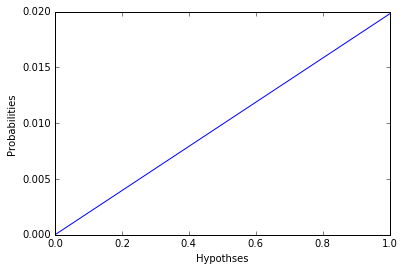

In [33]:
# Initialize a redditor using a Beta distribution

hypos = [i/100.0 for i in range(0,101)]
beta = Beta(2, 1)
hypos, probs = beta.MakePmf(hypos).Items()
prior_prob = dict(zip(hypos, probs))

redditor = Redditor(prior_prob, name='redditor')

redditor.probPlot()

mean_r = redditor.Mean()
mean_r

0.5000000000000003

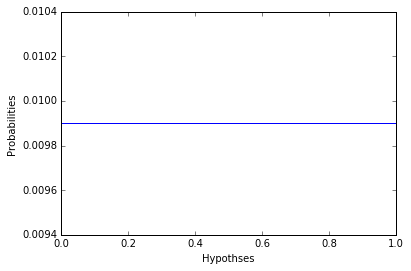

In [30]:
link = Link([i/100.0 for i in range(0,101)], name='link')

link.probPlot()

mean_q = link.Mean()
mean_q

In [34]:
redditor.Update([('up', mean_q)])
link.Update([('up', mean_r)])

Updated reliability 0.67
Credible interval of updated reliability 0.22 0.98


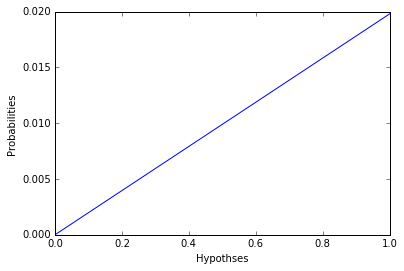

In [37]:
redditor.probPlot()
print "Updated reliability",redditor.Mean()
print "Credible interval of updated reliability", redditor.Percentile(5),redditor.Percentile(95)

Updated quality 0.5578
Credible interval of updated quality 0.07 0.97


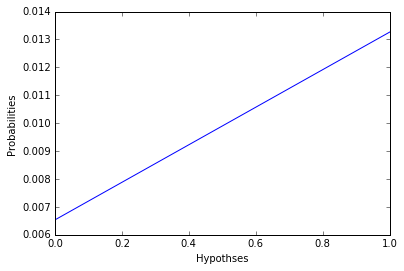

In [38]:
link.probPlot()
print "Updated quality",link.Mean()
print "Credible interval of updated quality", link.Percentile(5),link.Percentile(95)